In [3]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import time

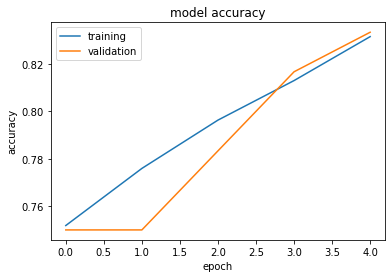

Accuracy: 84.00


In [76]:
# generate a simple model for test. 
# the model is a 3 layers neural network, the 1st layer is 12 neurons, relu is the activation function
# the second layer is 8 neurons, relu is the activation functioin
# the third layer is 1 neurons, sigmoid is the activation function 
# prepare the data set X is a numpy array strore the x1 and x2, Y store the classes for X. x2>=x1 is class 1, x2<x1 is class 2
np.random.seed(0)
X = np.random.uniform(0. , 100., [700,2])
Y = np.zeros((700, 1))

for row in range(700):
    if X[row][0] <= X[row][1]:
        Y[row] = 1
    else:
        Y[row] = 0
# divide into train and test data set
X_train = X[:600]
X_test = X[600:]
Y_train = Y[:600]
Y_test = Y[600:]

model = Sequential()

model.add(Dense(units=12, activation="relu", input_dim=2))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# plot the losses
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(X_train, Y_train, batch_size=100,epochs=5, verbose=0, validation_split=.1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))


In [2]:
# save model
model.save("x1_smaller_than_x2.h5")

NameError: name 'model' is not defined

In [64]:
# check the output is the probability that x1 is less than x2
np.random.seed(2)
xx = np.random.uniform(0., 100., [10,2])
yy = model_2.predict(xx)
print(xx)
print(yy)

[[43.59949021  2.59262318]
 [54.96624779 43.53223926]
 [42.03678021 33.0334821 ]
 [20.4648634  61.92709664]
 [29.96546737 26.68272751]
 [62.11338328 52.91420943]
 [13.45799453 51.35781213]
 [18.44398656 78.53351478]
 [85.39752926 49.42368374]
 [84.65614854  7.9645477 ]]
[[4.0590763e-04]
 [2.3622215e-02]
 [5.1071316e-02]
 [9.9547446e-01]
 [2.5383249e-01]
 [4.6455026e-02]
 [9.8709702e-01]
 [9.9846488e-01]
 [9.9760000e-06]
 [1.4067783e-07]]


In [94]:
# try to find out that when x1 is really close to x2 then the output is really near to 0.5
np.random.seed(2)
xx2 = np.ones((7,2))
xx2[0] = [6.,6.23]
xx2[1] = [2.,2.2]
xx2[2] = [20.,20.]
xx2[4] = [45.,45.1]
xx2[5] = [36.,36.44]
xx2[6] = [90., 8.]
print(xx2)

yy2 = model_2.predict(xx2)
print(yy2)

[[ 6.    6.23]
 [ 2.    2.2 ]
 [20.   20.  ]
 [ 1.    1.  ]
 [45.   45.1 ]
 [36.   36.44]
 [90.    8.  ]]
[[6.7096126e-01]
 [5.5006206e-01]
 [9.2012209e-01]
 [5.0975156e-01]
 [9.9651408e-01]
 [9.8956823e-01]
 [7.5516091e-08]]


In [7]:
# load the model 
model_2 = keras.models.load_model("x1_smaller_than_x2_83%.h5")

In [17]:
# prepare the required parameters and load the functions need to be used
%run single_layer_interval_propagation.ipynb
%run simple_interval_propagation.ipynb
# the output should be all less than 0.5 because all the x1 is larger than x2 in this interval. each valus in maximum vector should less than 0,5
# set the initial input region
min_vec = np.array([[50., 0.1]])
max_vec = np.array([[900., 49.]])
initial_region = [min_vec, max_vec]

In [18]:
# TODO list is first in first out, larger interval has priority.
# get the start time
start_time=time.time()
# set the time out seconds. if this time is reached, it will stop to verify the intervals in the TODO list.
total_seconds = 2

# initial a first-in-first-out list, it only has the first region we want to check. 
list_fifo = []
list_fifo.append(initial_region)
list_fifo_log=[]
list_fifo_log.append(initial_region)
# list to store all counter examples
counter_examples = []

while True:
    
    # update elapsed_time
    elapsed_time = time.time() - start_time
    
    #check if the list_fifo is empty, if it is empty, all intervals have passed the check
    if not list_fifo:
        print("the interval certification success! use "+str(elapsed_time)+" seconds! success!")
        break # break the main loop
        
    if elapsed_time > total_seconds:
        print("time out! Searching the counter examples in the TODO list! "+str(len(list_fifo))+" intervals in TODO list!")
        # before return time out, check if the regions in the list has counter examples?
        counter_examples = if_any_counter_example_model_2_large_first(model_2, list_fifo)
        if counter_examples:
            # if there is counter examples, print counter examples
            print("Found "+str(len(counter_examples))+" counter examples: ")
            for example in counter_examples:
                print(str(example))
            break
        else:
            # if can not found counter examples, print failed notification
            print("Fail to certify the nn model with the given region and specification! use "+str(elapsed_time)+" seconds! And cannot found counter example!")
            break
    
    
    input_region = list_fifo.pop(0)
    input_min = input_region[0]
    input_max = input_region[1]
    
    outputMin, outputMax = simple_interval_propagation_model(model_2, input_min, input_max)
    
    # check if the output(outputMin,outputMax) is satisfy the specification
    # for this example is all values in outputMax is less than 0.5
    if not check_specification_model_2(outputMax):
        # split into two intervals, and add these two intervals into list_fifo
        region1=[]
        region2=[]
        region1, region2 = split_2(input_min, input_max)
        list_fifo.append(region1)
        list_fifo.append(region2)
        list_fifo_log.append(region1)
        list_fifo_log.append(region2)

time out! Searching the counter examples in the TODO list! 1220 intervals in TODO list!
Found 1 counter examples: 
[[50.62255859 40.78632812]]


In [55]:
print(len(list_fifo_log))
print(list_fifo_log)
for region in list_fifo_log:
    input_min = input_region[0]
    input_max = input_region[1]
    outputMin, outputMax = simple_interval_propagation_model(model_2, input_min, input_max)
    print(outputMax)

11
[[array([[50. ,  0.1]]), array([[900.,  49.]])], [array([[50. ,  0.1]]), array([[475.,  49.]])], [array([[4.75e+02, 1.00e-01]]), array([[900.,  49.]])], [array([[50. ,  0.1]]), array([[262.5,  49. ]])], [array([[2.625e+02, 1.000e-01]]), array([[475.,  49.]])], [array([[4.75e+02, 1.00e-01]]), array([[687.5,  49. ]])], [array([[6.875e+02, 1.000e-01]]), array([[900.,  49.]])], [array([[50. ,  0.1]]), array([[156.25,  49.  ]])], [array([[1.5625e+02, 1.0000e-01]]), array([[262.5,  49. ]])], [array([[2.625e+02, 1.000e-01]]), array([[368.75,  49.  ]])], [array([[3.6875e+02, 1.0000e-01]]), array([[475.,  49.]])]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]


In [22]:
# ouput the 4 round in main for loop, actually it is 3 round.
# first is to check min(70, 7), max(90, 20)，because the output maximum value is 0.99. 
# then split the region into two part region1[min(70, 7); max(80,20)]; region2[min(80,7);max(90,20)]
# these two regions' output maximum value are both smaller than 0.5
min_vec = np.array([[70., 7.]])
max_vec = np.array([[90., 20.]])
outputMin, outputMax = simple_interval_propagation_model(model_2, min_vec, max_vec)
print(outputMin)
print(outputMax)
min_vec = np.array([[70.], [7.]])
max_vec = np.array([[80.], [20.]])
outputMin, outputMax = simple_interval_propagation_model(model_2, min_vec, max_vec)
print(outputMin)
print(outputMax)
min_vec = np.array([[80.], [7.]])
max_vec = np.array([[90.], [20.]])
outputMin, outputMax = simple_interval_propagation_model(model_2, min_vec, max_vec)
print(outputMin)
print(outputMax)

[[1.51758515e-13]]
[[0.99043261]]
[[6.57964252e-12]]
[[0.26144672]]
[[2.92889482e-13]]
[[0.0694856]]


In [12]:
# TODO list is last in first out, smaller interval have prioruty 
# get the start time
start_time=time.time()
# set the time out seconds. if this time is reached, it will stop to verify the intervals in the TODO list.
total_seconds = 2

# initial a first-in-first-out list, it only has the first region we want to check. 
list_lifo = []
list_lifo.append(initial_region)
# list to store all counter examples
counter_examples = []

while True:
    
    # update elapsed_time
    elapsed_time = time.time() - start_time
    
    #check if the list_lifo is empty, if it is empty, all intervals have passed the check
    if not list_lifo:
        print("the interval certification success! use "+str(elapsed_time)+" seconds! success!")
        break # break the main loop
        
    if elapsed_time > total_seconds:
        print("time out! Searching the counter examples in the TODO list! "+str(len(list_lifo))+" intervals in TODO list!")
        # before return time out, check if the regions in the list has counter examples?
        counter_examples = if_any_counter_example_model_2_small_first(model_2, list_lifo)
        if counter_examples:
            # if there is counter examples, print counter examples
            print("Found "+str(len(counter_examples))+" counter examples: ")
            for example in counter_examples:
                print(str(example))
            break
        else:
            # if can not found counter examples, print failed notification
            print("Fail to certify the nn model with the given region and specification! use "+str(elapsed_time)+" seconds! And cannot found counter example!")
            break
    
    
    input_region = list_lifo.pop(len(list_lifo)-1)
    input_min = input_region[0]
    input_max = input_region[1]
    
    outputMin, outputMax = simple_interval_propagation_model(model_2, input_min, input_max)
    
    # check if the output(outputMin,outputMax) is satisfy the specification
    # for this example is all values in outputMax is less than 0.5
    if not check_specification_model_2(outputMax):
        # split into two intervals, and add these two intervals into list_lifo
        region1=[]
        region2=[]
        region1, region2 = split_2(input_min, input_max)
        list_lifo.append(region1)
        list_lifo.append(region2)

time out! Searching the counter examples in the TODO list! 83 intervals in TODO list!
Found 1 counter examples: 
[[70.96574605 49.        ]]


2021-11-08 18:14:48.387055: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-08 18:14:48.403805: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193825000 Hz


In [16]:
print(model_2.predict(counter_examples[0]))

[[0.9442816]]
